In [1]:
from pylab import *

In [2]:
from sklearn.datasets import make_circles

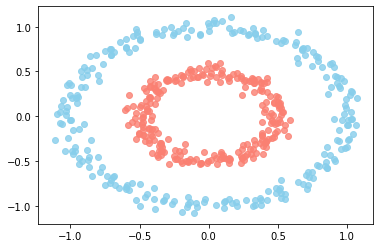

In [3]:
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

Y = Y.reshape(500, 1)

scatter(X[Y[:,0]==0, 0], X[Y[:,0]==0, 1], color="skyblue", alpha=0.8)
scatter(X[Y[:,0]==1, 0], X[Y[:,0]==1, 1], color="salmon", alpha=0.8)

show()

In [4]:
class NeuralLayer():
    def __init__(self, n_conn, n_neur, act_f, act_fd):
        self.act_f = act_f
        self.act_fd = act_fd
        
        self.bias = rand(1, n_neur)        *2-1
        self.params = rand(n_conn, n_neur) *2-1

In [5]:
sigm = lambda x: 1 / (1 + np.e ** (-x))
sigm_d = lambda x: x * (1-x)

cost_fn = lambda y_, y : np.mean((y_ - y)**2)
cost_fd = lambda y_, y : (y_ - y)

In [6]:
class NeuralNetwork:
    def __init__(self, topology, act_fn, act_fd, cost_fn, cost_fd):
        self.nn = []
        
        self._cost_f = cost_fn
        self._cost_fd = cost_fd
        
        
        for l in range(len(topology)-1):
            self.nn.append(
                NeuralLayer(
                    topology[l], topology[l+1], act_fn, act_fd
                )
            )
            
    def __call__(self, x):
        return self.forward(x)
    
    def forward(self, x):
        self.out = [(None, x)]
        
        for layer in self.nn:
            z = self.out[-1][1] @ layer.params + layer.bias
            a = layer.act_f(z)
            
            self.out.append((z, a))
            
        return self.out[-1][1]
    
    def train(self, X, Y, lr=0.005):
        self.forward(X)
        
        # Backward pass
        deltas = []
        
        for l in reversed(range(0, len(self.nn))):
            
            z = self.out[l+1][0]
            a = self.out[l+1][1]
            
            if l == len(self.nn) - 1:
                deltas.insert(0, self._cost_fd(a, Y) * self.nn[l].act_fd(a))
            else:
                deltas.insert(0, deltas[0] @ _W.T * self.nn[l].act_fd(a))
        
            _W = self.nn[l].params
            
            # Gradient descent
            self.nn[l].bias = self.nn[l].bias - np.mean(deltas[0], axis=0, keepdims=True) * lr
            self.nn[l].params = self.nn[l].params - self.out[l][1].T @ deltas[0] * lr
    
    def loss(self, Y):
        y_ = self.out[-1][1]
        return self._cost_f(y_, Y)

In [7]:
topology = [2, 4, 8, 1]

model = NeuralNetwork(topology, sigm, sigm_d, cost_fn, cost_fd)

In [8]:
import time
from IPython.display import clear_output

def train_model(model, x, y, epochs=1000, lr=0.005):
    loss = []
    
    for i in range(epochs):
        model.train(x, y, lr=lr)
        
        if i % 25 == 0:
            loss.append(model.loss(y))
            
            res = 50
            
            _x0 = np.linspace(-1.5, 1.5, res)
            _x1 = np.linspace(-1.5, 1.5, res)
            
            _Y = np.zeros((res, res))
            
            for i0, x0 in enumerate(_x0):
                for i1, x1 in enumerate(_x1):
                    _Y[i0, i1] = model(np.array([[x0, x1]]))
                    
            plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
            
            
            plt.scatter(X[Y[:,0]==0, 0], X[Y[:,0]==0, 1], color="skyblue", alpha=0.8)
            plt.scatter(X[Y[:,0]==1, 0], X[Y[:,0]==1, 1], color="salmon", alpha=0.8)
            
            clear_output(wait=True)
            plt.show()
            plt.plot(range(len(loss)), loss)
            plt.show()
            time.sleep(0.5)            

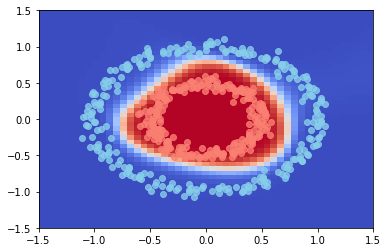

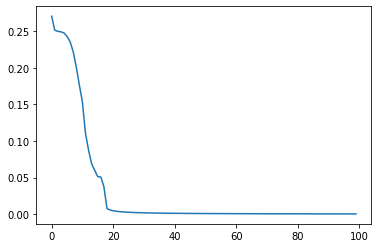

In [9]:
train_model(model, X, Y, epochs=2500, lr=0.05)

In [10]:
model.loss(Y)

0.00040354420773689223